In [37]:
from langgraph.graph import StateGraph,START,END
from langchain_huggingface import ChatHuggingFace,HuggingFaceEndpoint
from typing import TypedDict,Annotated,Literal,Union,List
from pydantic import BaseModel,Field
import operator
from langchain_core.messages import BaseMessage,SystemMessage, HumanMessage
import json
from langgraph.checkpoint.memory import MemorySaver

In [13]:
from langgraph.graph.message import add_messages
class ChatState(TypedDict):
    messages:Annotated[list[BaseMessage],add_messages]
    



In [ ]:
llm = HuggingFaceEndpoint(
    repo_id="meta-llama/Llama-3.1-8B-Instruct",
    task="text-generation",
    huggingfacehub_api_token='hf_token'
    
)

model = ChatHuggingFace(llm=llm)

In [32]:
def chat_node(state:ChatState):
    messages = state['messages']

    response=model.invoke(messages).content

    return {'messages':[response]}


In [38]:
checkpointer = MemorySaver()
graph = StateGraph(ChatState)

graph.add_node('chatnode',chat_node)

graph.add_edge(START,'chatnode')

graph.add_edge('chatnode',END)


chatbot = graph.compile(checkpointer=checkpointer)


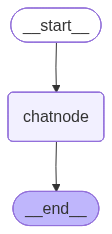

In [39]:
chatbot

In [35]:
initial_state={
    'messages':[HumanMessage(content="what is the capital of india")]
}

chatbot.invoke(initial_state)['messages'][-1].content

'The capital of India is New Delhi.'

In [40]:
thread_id = '1'

while True:
    user_message= input('type here : ')
    print('user : ',user_message)
    if user_message.strip().lower() in ['exit','quit','bye']:
        break

    config = {"configurable":{'thread_id':thread_id}}
    response = chatbot.invoke({'messages':[HumanMessage(content=user_message)]},config=config)

    print('AI : ',response['messages'][-1].content)

user :  hi my name is nitish
AI :  Hello Nitish, it's nice to meet you. Is there something I can help you with or would you like to chat?
user :  what is my name
AI :  Your name is Nitish.
user :  add 10 and 100
AI :  To add 10 and 100, we need to simply add the numbers together.

10 + 100 = 110

So the result is 110.
user :  now multiply it with 2
AI :  To multiply 110 by 2, we need to simply multiply the numbers together.

110 × 2 = 220

So the result is 220.
user :  bye


In [41]:
chatbot.get_state(config=config)

StateSnapshot(values={'messages': [HumanMessage(content='hi my name is nitish', additional_kwargs={}, response_metadata={}, id='dc273181-a829-4581-87f1-ba888dc2f9b1'), HumanMessage(content="Hello Nitish, it's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={}, id='8c40c5c5-c992-477c-b2f7-9c4b28be9a5e'), HumanMessage(content='what is my name', additional_kwargs={}, response_metadata={}, id='4013f836-ff4c-4aa4-bd82-3b5b5de91cb8'), HumanMessage(content='Your name is Nitish.', additional_kwargs={}, response_metadata={}, id='89b00314-880b-443c-88f9-a70d7a38a100'), HumanMessage(content='add 10 and 100', additional_kwargs={}, response_metadata={}, id='41aefdb7-1e98-4c78-9338-6c69588c2612'), HumanMessage(content='To add 10 and 100, we need to simply add the numbers together.\n\n10 + 100 = 110\n\nSo the result is 110.', additional_kwargs={}, response_metadata={}, id='3a206342-ae3d-4e1a-b4bb-cde047d4d345'), HumanMessag